In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

In [3]:
tesla = yf.Ticker('TSLA')

In [4]:
tesla_data = tesla.history(period = "max")

In [5]:
tesla_data.reset_index(inplace = True)

In [104]:
tesla_data['Date'] = pd.to_datetime(tesla_data['Date']).dt.date

In [106]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [121]:
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

In [100]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

In [8]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [66]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

In [67]:
soup = BeautifulSoup(html_data, 'html5lib')
#soup = html_data.find_all('tbody')
tables = soup.find_all('tbody')[1]

In [86]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [87]:
for row in tables.find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = tesla_revenue._append({"Date":date, "Revenue":revenue}, ignore_index=True)    

In [94]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",","")

In [92]:
tesla_revenue = tesla_revenue.drop(index = tesla_revenue.iloc[51].name)

In [95]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [23]:
gme = yf.Ticker('GME')

In [24]:
gme_data = gme.history(period = "max")

In [25]:
gme_data.reset_index(inplace = True)

In [102]:
gme_data['Date'] = pd.to_datetime(gme_data['Date']).dt.date

In [103]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [123]:
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

In [27]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [55]:
html_data = requests.get(url).text

In [56]:
soup = BeautifulSoup(html_data, 'html5lib')
tables = soup.find_all('tbody')[1]

In [57]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [58]:
for row in tables.find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = gme_revenue._append({"Date":date, "Revenue":revenue}, ignore_index=True) 

In [59]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$","").str.replace(",","")

In [107]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [118]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

/var/folders/tt/4h4xssjn4gl9v7wh4kjd5g900000gp/T/ipykernel_60710/3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/var/folders/tt/4h4xssjn4gl9v7wh4kjd5g900000gp/T/ipykernel_60710/3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



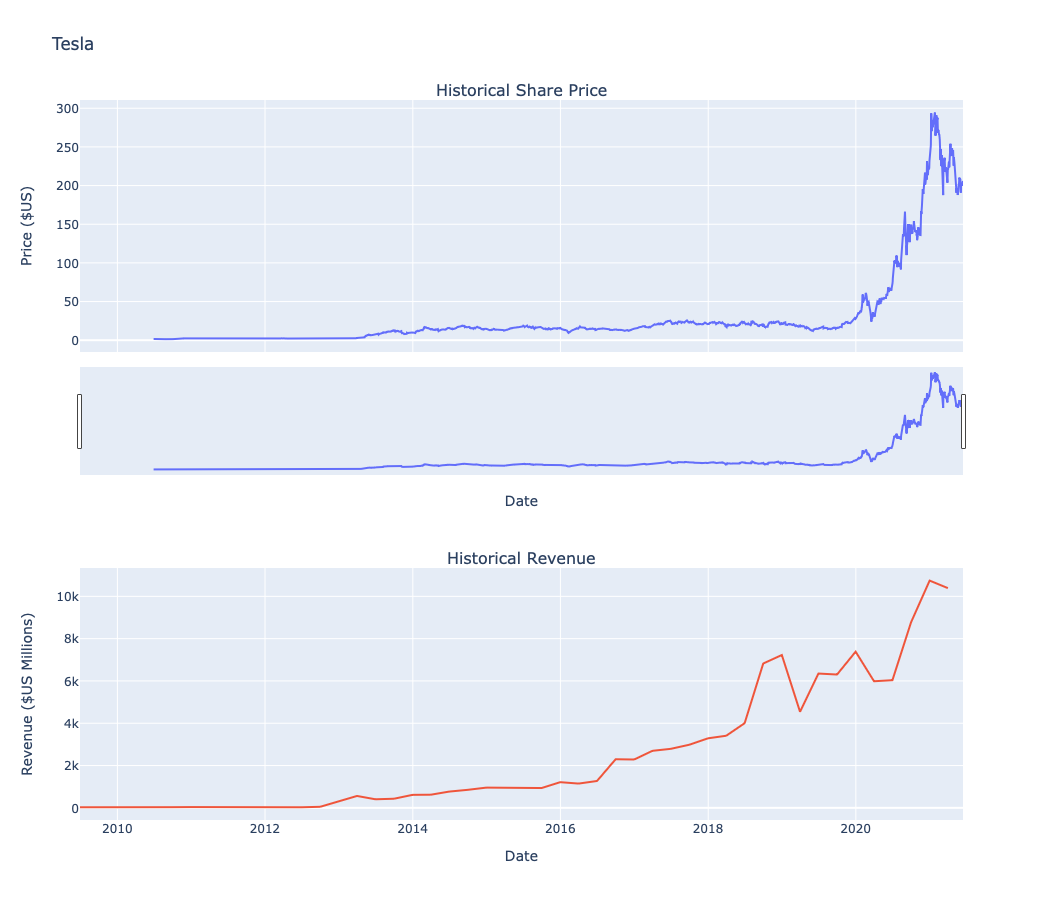

In [122]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

/var/folders/tt/4h4xssjn4gl9v7wh4kjd5g900000gp/T/ipykernel_60710/3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/var/folders/tt/4h4xssjn4gl9v7wh4kjd5g900000gp/T/ipykernel_60710/3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



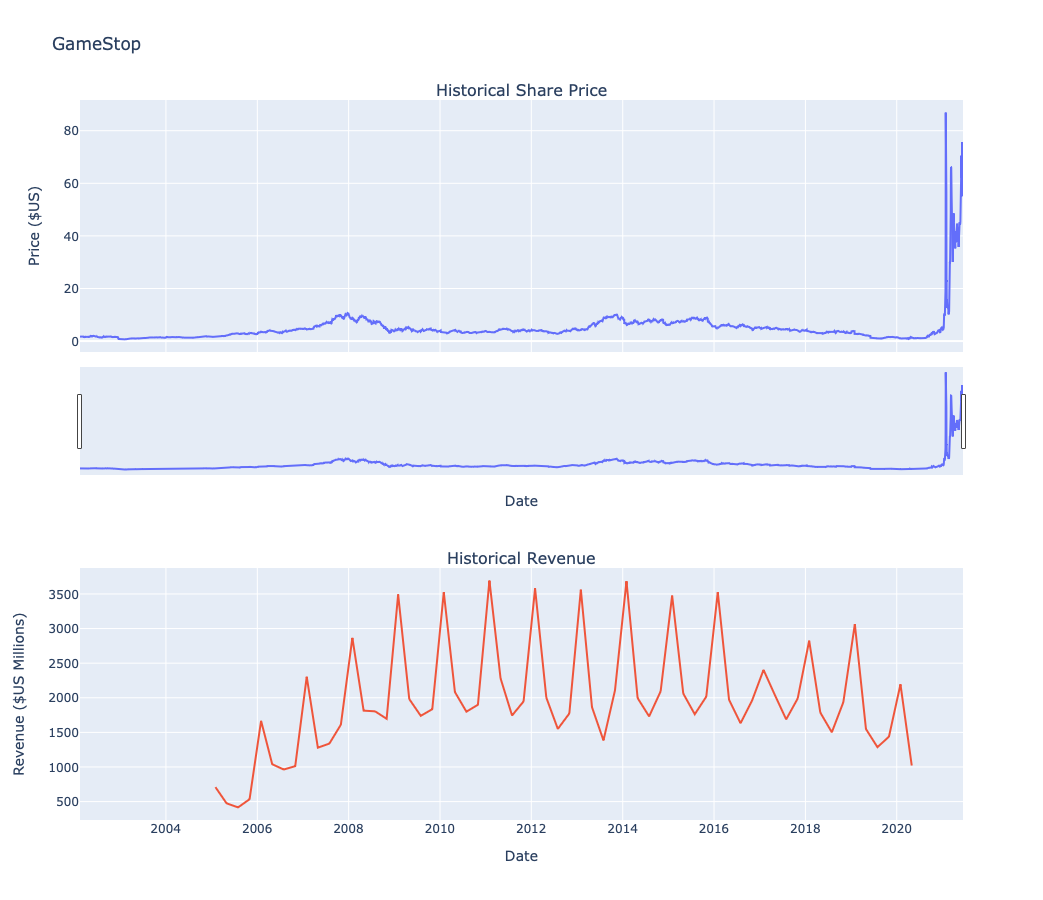

In [124]:
make_graph(gme_data, gme_revenue, 'GameStop')